# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [66]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from random import uniform

# Import API key
from config import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "cities.csv"


## Create dataframe

In [67]:
# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

# Randomly generate a list of 1500 cities. Testing 50 for duplicates.
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      616
City       616
Country    616
dtype: int64

## Perform API Calls

In [68]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
revised_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        revised_cities_df.set_value(index, "City", city_data["name"])
        revised_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        revised_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        revised_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        revised_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        revised_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        revised_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        revised_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Processing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1


Beginning Data Retrieval


/Users/nikhilkundra/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nikhilkundra/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nikhilkundra/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nikhilkundra/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nikhilkundra/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:25: 

------------------------
Processing: City #  1  |  Kapaa US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=kapaa
------------------------
Processing: City #  2  |  Ribeira Grande PT
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=ribeira+grande
------------------------
Processing: City #  3  |  Nokaneng BW
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=nokaneng
------------------------
Processing: City #  4  |  Albany US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=albany
------------------------
Processing: City #  5  |  Tabou CI
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=tabou
------------------------
Processing: City #  6  |  Ushuaia AR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e

------------------------
Processing: City #  47  |  College US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=college
------------------------
Processing: City #  48  |  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=cape+town
------------------------
Processing: City #  49  |  Issoire FR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=issoire
------------------------
Processing: City #  50  |  Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=punta+arenas
------------------------
Processing: City #  51  |  Alugan PH
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=alugan
------------------------
Processing: City #  52  |  Tuktoyaktuk CA
http://api.openweathermap.org/data/2.5/weather?appi

------------------------
Processing: City #  93  |  Fairbanks US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=fairbanks
------------------------
Processing: City #  94  |  Hilo US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=hilo
------------------------
Processing: City #  95  |  Kodiak US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=kodiak
City not found, skipping...
------------------------
Processing: City #  96  |  Victoria BN
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=victoria
------------------------
Processing: City #  97  |  Hare Bay CA
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=hare+bay
------------------------
Processing: City #  98  |  Grand Gaube MU
http://api.openweathermap.org/data/

------------------------
Processing: City #  139  |  Suntar RU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=suntar
------------------------
Processing: City #  140  |  Pontes e Lacerda BR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=pontes+e+lacerda
------------------------
Processing: City #  141  |  Camacha PT
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=camacha
------------------------
Processing: City #  142  |  Bluff AU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=bluff
------------------------
Processing: City #  143  |  Rurrenabaque BO
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=rurrenabaque
------------------------
Processing: City #  144  |  San Fernando TT
http://api.openweathermap.org/data

------------------------
Processing: City #  185  |  Gamba CN
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=gamba
City not found, skipping...
------------------------
Processing: City #  186  |  Wellington NZ
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=wellington
------------------------
Processing: City #  187  |  Yazd IR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=yazd
------------------------
Processing: City #  188  |  Poronaysk RU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=poronaysk
------------------------
Processing: City #  189  |  Boa Vista BR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=boa+vista
------------------------
Processing: City #  190  |  Batemans Bay AU
http://api.openweatherma

City not found, skipping...
------------------------
Processing: City #  231  |  Xuddur SO
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=xuddur
------------------------
Processing: City #  232  |  Leh IN
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=leh
------------------------
Processing: City #  233  |  Nishihara JP
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=nishihara
------------------------
Processing: City #  234  |  Minot US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=minot
------------------------
Processing: City #  235  |  Omis HR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=omis
------------------------
Processing: City #  236  |  Varkkallai IN
http://api.openweathermap.org/data/2.5/weather

------------------------
Processing: City #  277  |  Eureka US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=eureka
------------------------
Processing: City #  278  |  Lodja CD
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=lodja
------------------------
Processing: City #  279  |  Roswell US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=roswell
------------------------
Processing: City #  280  |  Port Macquarie AU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=port+macquarie
------------------------
Processing: City #  281  |  Hasaki JP
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=hasaki
------------------------
Processing: City #  282  |  La Ronge CA
http://api.openweathermap.org/data/2.5/weather?appid=8

------------------------
Processing: City #  323  |  Qiyang CN
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=qiyang
------------------------
Processing: City #  324  |  Sovetskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=sovetskiy
------------------------
Processing: City #  325  |  Nara JP
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=nara
------------------------
Processing: City #  326  |  Raudeberg NO
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=raudeberg
------------------------
Processing: City #  327  |  Paidha UG
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=paidha
------------------------
Processing: City #  328  |  Vilyuysk RU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa72

------------------------
Processing: City #  369  |  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=hualmay
------------------------
Processing: City #  370  |  Sao Filipe CV
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=sao+filipe
------------------------
Processing: City #  371  |  Necochea AR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=necochea
------------------------
Processing: City #  372  |  Casper US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=casper
------------------------
Processing: City #  373  |  Phuntsholing IN
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=phuntsholing
------------------------
Processing: City #  374  |  Pizarro CO
http://api.openweathermap.org/data/2.5/weathe

------------------------
Processing: City #  414  |  Gao ML
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=gao
------------------------
Processing: City #  415  |  Hervey Bay AU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=hervey+bay
------------------------
Processing: City #  416  |  Pleasanton US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=pleasanton
------------------------
Processing: City #  417  |  Henties Bay NA
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=henties+bay
------------------------
Processing: City #  418  |  Veraval FR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=veraval
------------------------
Processing: City #  419  |  Razdolinsk RU
http://api.openweathermap.org/data/2.5/weather

------------------------
Processing: City #  460  |  Marondera ZW
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=marondera
------------------------
Processing: City #  461  |  Iqaluit CA
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=iqaluit
------------------------
Processing: City #  462  |  Tezu IN
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=tezu
------------------------
Processing: City #  463  |  Nieves MX
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=nieves
------------------------
Processing: City #  464  |  Victor Harbor AU
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=victor+harbor
------------------------
Processing: City #  465  |  Saint-Joseph FR
http://api.openweathermap.org/data/2.5/weather?a

------------------------
Processing: City #  506  |  Aripuana BR
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=aripuana
City not found, skipping...
------------------------
Processing: City #  507  |  Waddan LY
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=waddan
------------------------
Processing: City #  508  |  Lima PE
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=lima
------------------------
Processing: City #  509  |  Mountain Brook US
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=mountain+brook
------------------------
Processing: City #  510  |  Gizo IL
http://api.openweathermap.org/data/2.5/weather?appid=82584aa721244e8b9c08249bb9b5e295&units=IMPERIAL&q=gizo
------------------------
Processing: City #  511  |  Tigil RU
http://api.openweathermap.org/dat

In [69]:
revised_cities_df.count()

City                551
Country             551
Temperature (F)     551
Latitude            551
Longitude           551
Humidity (%)        551
Cloudiness (%)      551
Wind Speed (mph)    551
dtype: int64

In [70]:
#Reset the index
revised_cities_df = revised_cities_df.reset_index()
del revised_cities_df['index']
revised_cities_df.head(10)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kapaa,US,69.96,22.08,-159.32,69,40,12.75
1,Ribeira Grande,PT,57.2,38.52,-28.7,76,40,17.22
2,Nokaneng,BW,69.53,-19.66,22.19,37,0,14.14
3,Albany,US,34.21,42.65,-73.75,44,20,16.11
4,Tabou,CI,81.41,4.42,-7.36,100,12,9.44
5,Ushuaia,AR,39.2,-54.81,-68.31,80,90,8.05
6,Arraial do Cabo,BR,73.94,-22.97,-42.02,100,0,12.01
7,Jumla,NP,44.96,29.28,82.18,71,0,1.72
8,Maceio,BR,75.2,-9.67,-35.74,88,20,3.36
9,Aquiraz,BR,75.83,-3.9,-38.39,88,75,5.82


In [76]:
# Save data to a CSV file
revised_cities_df.to_csv("City_Data.csv")

## Latitude vs. Temperature Plot

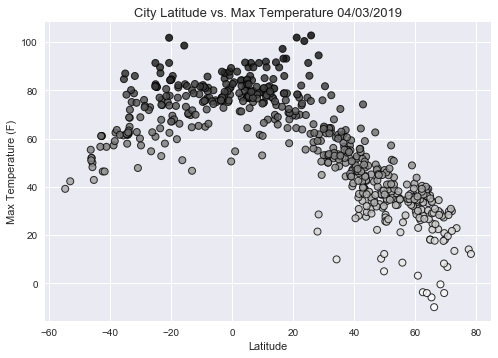

In [77]:
#Build a scatter plot for Latitude vs. Temperature

# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")

plt.scatter(revised_cities_df["Latitude"], 
            revised_cities_df["Temperature (F)"], c=revised_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date}", fontsize = 13)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("Latitude vs Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

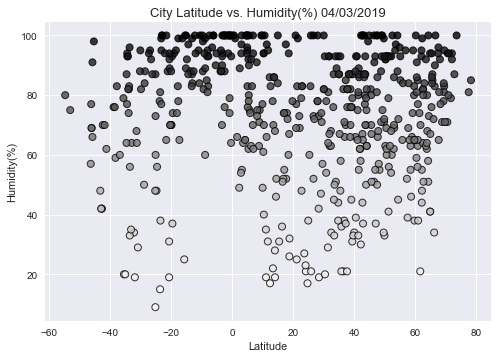

In [81]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(revised_cities_df["Latitude"], 
            revised_cities_df["Humidity (%)"], c=revised_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity(%) {date}", fontsize = 13)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("Latitude vs Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

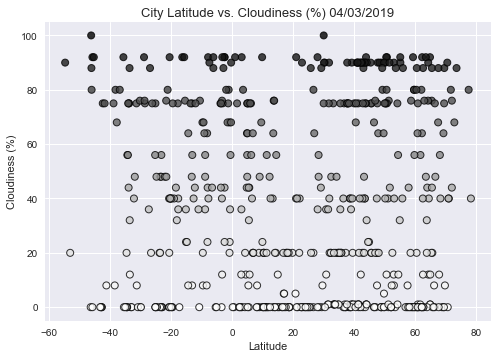

In [82]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(revised_cities_df["Latitude"], 
            revised_cities_df["Cloudiness (%)"], c=revised_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) {date}", fontsize = 13)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

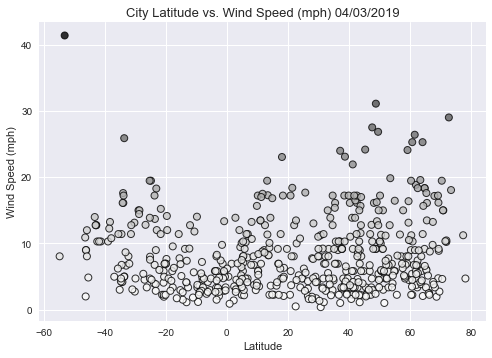

In [83]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(revised_cities_df["Latitude"], 
            revised_cities_df["Wind Speed (mph)"], c=revised_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) {date}", fontsize = 13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Latitude vs WindSpeed.png")

# Show plot
plt.show()